In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=100)

race = pd.read_csv('../data/races.csv', na_values='\\N')
results = pd.read_csv('../data/results.csv', na_values='\\N')
constructors = pd.read_csv('../data/constructors.csv', na_values='\\N',encoding='latin1')
driver_standing = pd.read_csv('../data/driver_standings.csv', na_values='\\N')
driver = pd.read_csv('../data/drivers.csv', na_values='\\N',encoding='latin1')

<Figure size 1000x1000 with 0 Axes>

In [ ]:
clean_result = results[['raceId', 'constructorId', 'positionOrder']].rename(columns={'positionOrder': 'race_position'})
clean_races = race[['raceId','year']]
clean_constructor = constructors[['constructorId', 'name']]

master_df3 = clean_result.merge(clean_races, on='raceId',how='inner').merge(clean_constructor,on='constructorId',how='inner')

master_df3.head()


,raceId,constructorId,race_position,year,name
0,18,1,1,2008,McLaren
1,18,2,2,2008,BMW Sauber
2,18,3,3,2008,Williams
3,18,4,4,2008,Renault
4,18,1,5,2008,McLaren


In [4]:
final_df = master_df3[master_df3['year'] >= 2005].copy()
final_df.head()

,raceId,constructorId,race_position,year,name
0,18,1,1,2008,McLaren
1,18,2,2,2008,BMW Sauber
2,18,3,3,2008,Williams
3,18,4,4,2008,Renault
4,18,1,5,2008,McLaren


In [5]:
final_df.columns

Index(['raceId', 'constructorId', 'race_position', 'year', 'name'], dtype='object')

In [6]:
season_constructor_perf = (final_df.groupby(['year', 'name']).agg(avg_race_position=('race_position', 'mean')).reset_index())
season_constructor_perf.head(20)

,year,name,avg_race_position
0,2005,BAR,11.529412
1,2005,Ferrari,8.500000
2,2005,Jordan,13.868421
3,2005,McLaren,6.842105
4,2005,Minardi,15.289474
5,2005,Red Bull,11.473684
6,2005,Renault,6.131579
7,2005,Sauber,11.263158
8,2005,Toyota,8.236842
9,2005,Williams,11.026316


In [7]:
idx = season_constructor_perf.groupby('year')['avg_race_position'].idxmin()

dominant_constructors = (season_constructor_perf.loc[idx].sort_values('year').reset_index(drop=True))

dominant_constructors.head(10)

,year,name,avg_race_position
0,2005,Renault,6.131579
1,2006,Renault,4.916667
2,2007,McLaren,3.970588
3,2008,BMW Sauber,6.055556
4,2009,Brawn,4.882353
5,2010,Red Bull,6.026316
6,2011,Red Bull,3.473684
7,2012,Red Bull,6.475000
8,2013,Red Bull,4.815789
9,2014,Mercedes,4.210526


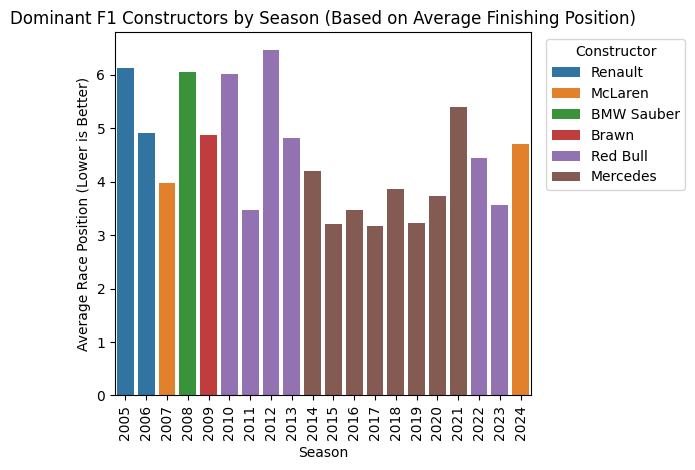

In [ ]:
sns.barplot(data=dominant_constructors,x='year',y='avg_race_position',hue='name',dodge=False)

plt.title('Dominant F1 Constructors by Season (Based on Average Finishing Position)')

plt.xlabel('Season')
plt.ylabel('Average Race Position (Lower is Better)')

plt.xticks(rotation=90)

plt.legend(title='Constructor',bbox_to_anchor=(1.02, 1),loc='upper left')
plt.savefig('../visuals/dominant_constructors.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [12]:
clean_result2 = results[['raceId', 'driverId', 'constructorId', 'positionOrder']].rename(columns={'positionOrder': 'race_position'})
clean_drivers = driver[['driverId','code','surname']]

driver_race_df = clean_result2.merge(clean_races,on='raceId',how='inner')
driver_race_df.head()


,raceId,driverId,constructorId,race_position,year
0,18,1,1,1,2008
1,18,2,2,2,2008
2,18,3,3,3,2008
3,18,4,4,4,2008
4,18,5,1,5,2008


In [16]:
season_driver_stats = (driver_race_df.groupby(['year', 'driverId']).agg(avg_race_position=('race_position', 'mean'),race_count=('race_position', 'count')).reset_index())

season_race_counts = (driver_race_df.groupby('year')['raceId'].nunique().reset_index(name='total_races'))

season_driver_stats = season_driver_stats.merge(season_race_counts,on='year',how='left')
season_driver_stats = season_driver_stats[season_driver_stats['race_count'] >= 0.7 * season_driver_stats['total_races']]

top_driver_per_year = season_driver_stats.loc[season_driver_stats.groupby('year')['avg_race_position'].idxmin()].reset_index(drop=True)

top_driver_per_year = top_driver_per_year.merge(clean_drivers[['driverId', 'code', 'surname']],on='driverId',how='left')

top_driver_per_year_after_2005 = top_driver_per_year[top_driver_per_year['year'] >= 2005].copy()

top_driver_per_year_after_2005.head()

,year,driverId,avg_race_position,race_count,total_races,code,surname
55,2005,4,3.631579,19,19,ALO,Alonso
56,2006,4,3.555556,18,18,ALO,Alonso
57,2007,1,3.941176,17,17,HAM,Hamilton
58,2008,1,5.222222,18,18,HAM,Hamilton
59,2009,18,4.352941,17,17,BUT,Button


In [18]:
driver_season_constructor = (driver_race_df.groupby(['year', 'driverId', 'constructorId']).size().reset_index(name='race_count'))

driver_season_constructor_main = (driver_season_constructor.loc[driver_season_constructor.groupby(['year', 'driverId'])['race_count'].idxmax()].reset_index(drop=True))

top_driver_with_constructor = top_driver_per_year_after_2005.merge(driver_season_constructor_main[['year', 'driverId', 'constructorId']],on=['year', 'driverId'],how='left')

clean_constructors = constructors[['constructorId', 'name']].rename(columns={'name': 'constructor_name'})

top_driver_with_constructor = top_driver_with_constructor.merge(clean_constructors,on='constructorId',how='left')

top_driver_with_constructor[['year', 'code', 'surname', 'constructor_name', 'avg_race_position']].head()


,year,code,surname,constructor_name,avg_race_position
0,2005,ALO,Alonso,Renault,3.631579
1,2006,ALO,Alonso,Renault,3.555556
2,2007,HAM,Hamilton,McLaren,3.941176
3,2008,HAM,Hamilton,McLaren,5.222222
4,2009,BUT,Button,Brawn,4.352941


In [19]:
final_compare = top_driver_with_constructor.merge(dominant_constructors,on='year',how='left')

final_compare['is_driver_in_top_constructor'] = (final_compare['constructor_name'] == final_compare['name'])


In [23]:
final_compare

,year,driverId,avg_race_position_x,race_count,total_races,code,surname,constructorId,constructor_name,name,avg_race_position_y,is_driver_in_top_constructor
0,2005,4,3.631579,19,19,ALO,Alonso,4,Renault,Renault,6.131579,True
1,2006,4,3.555556,18,18,ALO,Alonso,4,Renault,Renault,4.916667,True
2,2007,1,3.941176,17,17,HAM,Hamilton,1,McLaren,McLaren,3.970588,True
3,2008,1,5.222222,18,18,HAM,Hamilton,1,McLaren,BMW Sauber,6.055556,False
4,2009,18,4.352941,17,17,BUT,Button,23,Brawn,Brawn,4.882353,True
5,2010,4,5.421053,19,19,ALO,Alonso,6,Ferrari,Red Bull,6.026316,False
6,2011,20,2.736842,19,19,VET,Vettel,9,Red Bull,Red Bull,3.473684,True
7,2012,4,5.200000,20,20,ALO,Alonso,6,Ferrari,Red Bull,6.475000,False
8,2013,20,2.631579,19,19,VET,Vettel,9,Red Bull,Red Bull,4.815789,True
9,2014,1,4.105263,19,19,HAM,Hamilton,131,Mercedes,Mercedes,4.210526,True


In [21]:
dominance_counts = final_compare['is_driver_in_top_constructor'].value_counts()

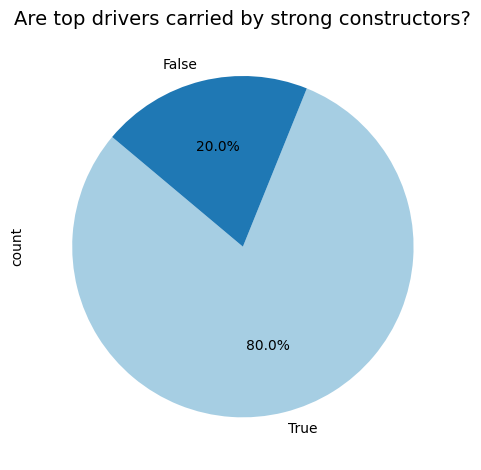

In [24]:
dominance_counts.plot.pie(autopct='%1.1f%%',startangle=140,colors=plt.cm.Paired.colors,labeldistance=1.1)
plt.title('Are top drivers carried by strong constructors?', fontsize=14)
plt.savefig('../visuals/top_driver_carried_by_strong_constructors.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()